<a href="https://colab.research.google.com/github/ahussain1724/Project1/blob/main/Hills_Climbing_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

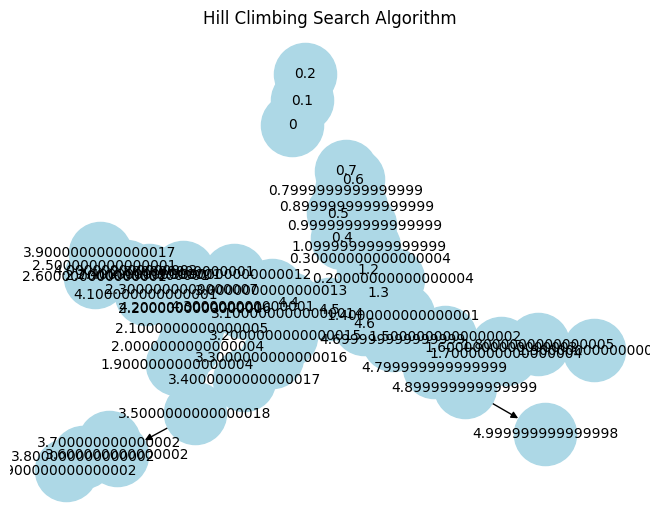

Maximum value found: 45.0
Position achieving maximum value: 4.999999999999998


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Define the mathematical function to be optimized (Quadratic Function)
def f(x):
    return -1 * (x ** 2) + 10 * x + 20

# Define the hill climbing search algorithm
def hill_climbing_search(func, initial_position, step_size, max_iterations):
    current_position = initial_position
    current_value = func(current_position)
    iteration = 1

    # Create a directed graph to visualize the search path
    G = nx.DiGraph()
    G.add_node(current_position)

    while iteration < max_iterations:
        # Generate new candidate positions
        neighbors = [current_position + step_size, current_position - step_size]

        # Select the neighbor with the highest value
        next_value = float("-inf")
        next_position = None
        for neighbor in neighbors:
            neighbor_value = func(neighbor)
            if neighbor_value > next_value:
                next_value = neighbor_value
                next_position = neighbor

        # If the best neighbor has a lower value than the current position, terminate
        if next_value <= current_value:
            break

        # Update current position and value
        current_position = next_position
        current_value = next_value

        # Add edge to the graph
        G.add_edge(current_position - step_size, current_position)

        # Increment iteration counter
        iteration += 1

    return current_position, current_value, G

# Define initial parameters
initial_position = 0
step_size = 0.1
max_iterations = 100

# Run hill climbing search
max_position, max_value, search_graph = hill_climbing_search(f, initial_position, step_size, max_iterations)

# Visualize the search path
pos = nx.spring_layout(search_graph)
nx.draw(search_graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10)
plt.title("Hill Climbing Search Algorithm")
plt.show()

print("Maximum value found:", max_value)
print("Position achieving maximum value:", max_position)
